In [166]:
import pandas as pd
import helpers.data_mining_helpers as dmh # my functions

# Load the CSV file
X = pd.read_csv('Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv')

# Inspect the columns (to check the column names)
print(X.columns)

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 
    # It allows you to see the plots immediately after running the code, 
    # without having to call additional functions like plt.show().

Index(['sentiment', 'comment'], dtype='object')


In [167]:
type(X)

pandas.core.frame.DataFrame

In [168]:
X.iloc[0:10, 0]
X.iloc[0:10]

sentiment                                            comment
0  not nostalgia  He was a singer with a golden voice that I lov...
1      nostalgia  The mist beautiful voice ever I listened to hi...
2      nostalgia  I have most of Mr. Reeves songs.  Always love ...
3  not nostalgia  30 day leave from 1st tour in Viet Nam to conv...
4      nostalgia  listening to his songs reminds me of my mum wh...
5      nostalgia  Every time I heard this song as a child, I use...
6      nostalgia  My dad loved listening to Jim Reeves, when I w...
7      nostalgia  i HAVE ALSO LISTENED TO Jim Reeves since child...
8  not nostalgia           Wherever you  are you always in my heart
9  not nostalgia  Elvis will always be number one no one can com...

In [169]:
# check missing values
X.isnull()

sentiment  comment
0         False    False
1         False    False
2         False    False
3         False    False
4         False    False
...         ...      ...
1495      False    False
1496      False    False
1497      False    False
1498      False    False
1499      False    False

[1500 rows x 2 columns]

In [170]:
X.isnull().apply(lambda x: dmh.check_missing_values(x)) # x == each row # axis = 0

sentiment                             comment
0  The amoung of missing records is:   The amoung of missing records is: 
1                                   0                                   0

In [171]:
X['sentiment_number'] = X['sentiment'].map({'not nostalgia': 0, 'nostalgia': 1})

In [172]:
X.head(10)

sentiment                                            comment  \
0  not nostalgia  He was a singer with a golden voice that I lov...   
1      nostalgia  The mist beautiful voice ever I listened to hi...   
2      nostalgia  I have most of Mr. Reeves songs.  Always love ...   
3  not nostalgia  30 day leave from 1st tour in Viet Nam to conv...   
4      nostalgia  listening to his songs reminds me of my mum wh...   
5      nostalgia  Every time I heard this song as a child, I use...   
6      nostalgia  My dad loved listening to Jim Reeves, when I w...   
7      nostalgia  i HAVE ALSO LISTENED TO Jim Reeves since child...   
8  not nostalgia           Wherever you  are you always in my heart   
9  not nostalgia  Elvis will always be number one no one can com...   

   sentiment_number  
0                 0  
1                 1  
2                 1  
3                 0  
4                 1  
5                 1  
6                 1  
7                 1  
8                 0  
9                 0

## Feature Creation

In [173]:
import nltk

In [174]:
# takes a like a minute or two to process
X['unigrams'] = X['comment'].apply(lambda x: dmh.tokenize_text(x))

In [175]:
X[['comment','unigrams']].head(10)

comment  \
0  He was a singer with a golden voice that I lov...   
1  The mist beautiful voice ever I listened to hi...   
2  I have most of Mr. Reeves songs.  Always love ...   
3  30 day leave from 1st tour in Viet Nam to conv...   
4  listening to his songs reminds me of my mum wh...   
5  Every time I heard this song as a child, I use...   
6  My dad loved listening to Jim Reeves, when I w...   
7  i HAVE ALSO LISTENED TO Jim Reeves since child...   
8           Wherever you  are you always in my heart   
9  Elvis will always be number one no one can com...   

                                            unigrams  
0  [He, was, a, singer, with, a, golden, voice, t...  
1  [The, mist, beautiful, voice, ever, I, listene...  
2  [I, have, most, of, Mr., Reeves, songs, ., Alw...  
3  [30, day, leave, from, 1st, tour, in, Viet, Na...  
4  [listening, to, his, songs, reminds, me, of, m...  
5  [Every, time, I, heard, this, song, as, a, chi...  
6  [My, dad, loved, listening, to, Jim, Reeves, ,...  
7  [i, HAVE, ALSO, LISTENED, TO, Jim, Reeves, sin...  
8   [Wherever, you, are, you, always, in, my, heart]  
9  [Elvis, will, always, be, number, one, no, one...

In [176]:
list(X['unigrams'][0])

['He',
 'was',
 'a',
 'singer',
 'with',
 'a',
 'golden',
 'voice',
 'that',
 'I',
 'love',
 'to',
 'hear',
 'all',
 'the',
 'time',
 '.',
 'I',
 'was',
 'his',
 'great',
 'fan',
 'at',
 'the',
 'age',
 'of',
 '16years',
 'in',
 'those',
 'days',
 'and',
 'still',
 'now',
 '.',
 'Although',
 'we',
 'have',
 'many',
 'singers',
 'now',
 ',',
 'but',
 ',',
 'I',
 'can',
 'vouch',
 'for',
 'Jim',
 'Reeves',
 'all',
 'the',
 'time',
 '.',
 'You',
 'feel',
 'relaxed',
 ',',
 'emotional',
 'and',
 'loving',
 '.',
 'Thank',
 'you',
 'Lord',
 'for',
 'his',
 'life',
 '.']

## Feature Subset Selection
generate a document-term matrix from the original dataset

In [177]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.comment) #learn the vocabulary and return document-term matrix
print(X_counts[0])

  (0, 1598)	1
  (0, 3570)	2
  (0, 2973)	1
  (0, 3650)	1
  (0, 1470)	1
  (0, 3534)	1
  (0, 3282)	1
  (0, 2028)	1
  (0, 3336)	1
  (0, 1606)	1
  (0, 233)	2
  (0, 3284)	3
  (0, 3328)	2
  (0, 1651)	2
  (0, 1512)	1
  (0, 1249)	1
  (0, 323)	1
  (0, 214)	1
  (0, 2341)	1
  (0, 15)	1
  (0, 1733)	1
  (0, 3304)	1
  (0, 907)	1
  (0, 258)	2
  (0, 3124)	1
  (0, 2328)	2
  (0, 245)	1
  (0, 3581)	1
  (0, 1591)	1
  (0, 2082)	1
  (0, 2974)	1
  (0, 573)	1
  (0, 593)	1
  (0, 3538)	1
  (0, 1347)	2
  (0, 1833)	1
  (0, 2671)	1
  (0, 3713)	2
  (0, 1272)	1
  (0, 2688)	1
  (0, 1125)	1
  (0, 2035)	1
  (0, 3278)	1
  (0, 2018)	1
  (0, 1964)	1


In [178]:
count_vect.get_feature_names_out()[1000]

'dj'

In [179]:
# Answer here
# How do we turn our array[0] text document into a tokenized text using the build_analyzer()?
analyze1 = count_vect.build_analyzer()
analyze1(X.comment[0])

['he',
 'was',
 'singer',
 'with',
 'golden',
 'voice',
 'that',
 'love',
 'to',
 'hear',
 'all',
 'the',
 'time',
 'was',
 'his',
 'great',
 'fan',
 'at',
 'the',
 'age',
 'of',
 '16years',
 'in',
 'those',
 'days',
 'and',
 'still',
 'now',
 'although',
 'we',
 'have',
 'many',
 'singers',
 'now',
 'but',
 'can',
 'vouch',
 'for',
 'jim',
 'reeves',
 'all',
 'the',
 'time',
 'you',
 'feel',
 'relaxed',
 'emotional',
 'and',
 'loving',
 'thank',
 'you',
 'lord',
 'for',
 'his',
 'life']

## term-document matrix shape

In [180]:
X_counts.shape

(1500, 3730)

In [181]:
# We can obtain the feature names of the vectorizer, i.e., the terms usually on the horizontal axis
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '045', '07', '10', '100', '10m', '11', '11th', '12'],
      dtype=object)

In [182]:
count_vect.get_feature_names_out()[0:1]

# .get_feature_names_out() returns an array of feature names (i.e., the vocabulary)
#  that the vectorizer has learned from the input text data.

# [0:1] -> slice operation that extracts the first element of the array
# returned by .get_feature_names_out().

array(['00'], dtype=object)

['term_00', 'term_000', 'term_045', 'term_07', 'term_10', 'term_100', 'term_10m', 'term_11', 'term_11th', 'term_12', 'term_13', 'term_14', 'term_15', 'term_150', 'term_16', 'term_16years', 'term_17', 'term_17th', 'term_18', 'term_19']
['doc_0', 'doc_1', 'doc_2', 'doc_3', 'doc_4', 'doc_5', 'doc_6', 'doc_7', 'doc_8', 'doc_9', 'doc_10', 'doc_11', 'doc_12', 'doc_13', 'doc_14', 'doc_15', 'doc_16', 'doc_17', 'doc_18', 'doc_19']
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0

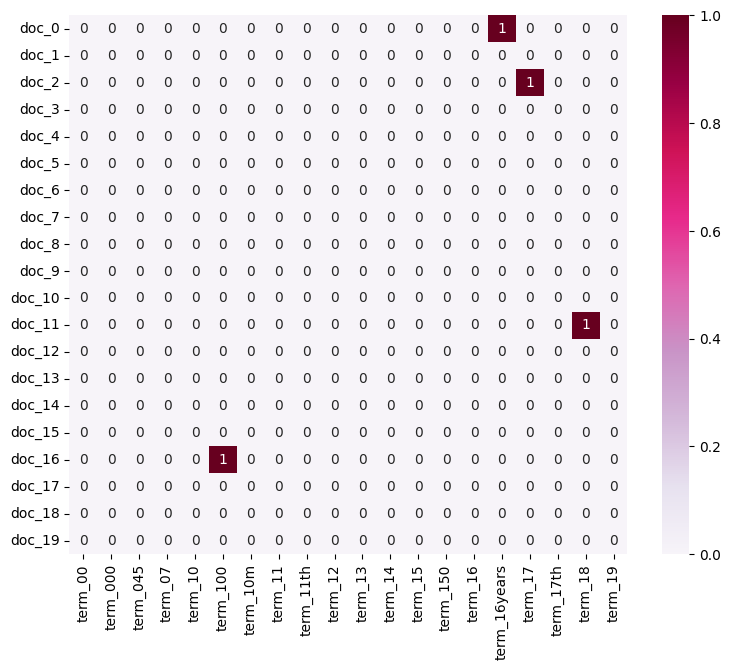

In [183]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
print(plot_x)
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
print(plot_y)
plot_z = X_counts[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]
print(plot_z)
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

## Attribute Transformation / Aggregation
First, we need to compute these frequencies for each term in all documents. Visually speaking, we are seeking to add values of the 2D matrix, vertically; i.e., sum of each column. You can also refer to this process as aggregation.

In [184]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
#[3, 8, 5, 2, 5, 8, 2, 5, 3, 2]

In [185]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [186]:
term_frequencies[0] #sum of first term: 00

1

In [187]:
# modify the code to select only a subset of terms based on their frequencies. 
# For instance, you can display the top N terms with the highest frequencies

import plotly.express as px
import numpy as np
import pandas as pd

# Calculate term frequencies efficiently
term_frequencies = np.asarray(X_counts.sum(axis=0)).flatten()

# Get top 150 terms with highest frequencies
top_n = 150  # Change this to reduce or increase the number of terms to visualize
top_indices = term_frequencies.argsort()[-top_n:][::-1]  # Indices of top N terms, sorted descending

# Extract top N terms and their frequencies
top_terms = count_vect.get_feature_names_out()[top_indices]
top_frequencies = term_frequencies[top_indices]

# Create a DataFrame for Plotly
df_plotly = pd.DataFrame({
    'Term': top_terms,
    'Frequency': top_frequencies
})

# Plot using Plotly
fig = px.bar(
    df_plotly, 
    x='Term', 
    y='Frequency', 
    title=f'Top {top_n} Term Frequencies',
    labels={'Term': 'Terms', 'Frequency': 'Frequency'},
    width=2000, height=600
)

# Update layout for better visualization
fig.update_layout(
    xaxis=dict(tickangle=60, tickmode='array', tickvals=df_plotly['Term']),
    margin=dict(l=40, r=40, t=40, b=200)
)

# Show the Plotly figure
fig.show()

In [188]:
import plotly.express as px
import numpy as np
import pandas as pd
import math

# Calculate term frequencies efficiently
term_frequencies = np.asarray(X_counts.sum(axis=0)).flatten()

# Get top 150 terms with highest frequencies
top_n = 150  # Change this to reduce or increase the number of terms to visualize
top_indices = term_frequencies.argsort()[-top_n:][::-1]  # Indices of top N terms, sorted descending

# Extract top N terms and their frequencies
top_terms = count_vect.get_feature_names_out()[top_indices]
top_frequencies = term_frequencies[top_indices]

# Apply log transformation to the frequencies (adding 1 to avoid log(0))
log_top_frequencies = [math.log(freq + 1) for freq in top_frequencies]

# Create a DataFrame for Plotly
df_plotly = pd.DataFrame({
    'Term': top_terms,
    'Frequency': log_top_frequencies
})

# Plot using Plotly
fig = px.bar(
    df_plotly, 
    x='Term', 
    y='Frequency', 
    title=f'Top {top_n} Term Frequencies (in Log distribution)',
    labels={'Term': 'Terms', 'Log Frequency': 'Log Frequency'},
    width=2000, height=600
)

# Update layout for better visualization
fig.update_layout(
    xaxis=dict(tickangle=60, tickmode='array', tickvals=df_plotly['Term']),
    margin=dict(l=40, r=40, t=40, b=200)
)

# Show the Plotly figure
fig.show()

##  Finding frequent patterns
using PAMI library

**Minimum Support**: It refers to the minimum frequency that a transaction has to have to be considered a pattern in our scenario.

In [189]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

#Create separate DataFrames for each category
categories = X['sentiment'].unique()  # Get unique category labels
category_dfs = {}  # Dictionary to store DataFrames for each category

for category in categories:
    # Filter the original DataFrame by category
    category_dfs[category] = X[X['sentiment'] == category].copy()

# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(df['comment'])  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each category
filt_term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for category in categories:
    filt_term_document_dfs[category] = create_term_document_df(category_dfs[category])

# Display the filtered DataFrame for one of the categories, feel free to change the number in the vector
category_number=0 #You can change it from 0 to 1
print(f"Filtered Term-Document Frequency DataFrame for Category \"{categories[category_number]}\":")
filt_term_document_dfs[categories[category_number]]

Filtered Term-Document Frequency DataFrame for Category "not nostalgia":


00  000  045  10  100  10m  11  12  14  15  ...  youngest  youngsters  \
0     0    0    0   0    0    0   0   0   0   0  ...         0           0   
1     0    0    0   0    0    0   0   0   0   0  ...         0           0   
2     0    0    0   0    0    0   0   0   0   0  ...         0           0   
3     0    0    0   0    0    0   0   0   0   0  ...         0           0   
4     0    0    0   0    0    0   0   0   0   0  ...         0           0   
..   ..  ...  ...  ..  ...  ...  ..  ..  ..  ..  ...       ...         ...   
745   0    0    0   0    0    0   0   0   0   0  ...         0           0   
746   0    0    0   0    0    0   0   0   0   0  ...         0           0   
747   0    0    0   0    0    0   0   0   0   0  ...         0           0   
748   0    0    0   0    0    0   0   0   0   0  ...         0           0   
749   0    0    0   0    0    0   0   0   0   0  ...         0           0   

     your  yourself  youth  youtube  yrs  yuo  zealand  zulus  
0       0         0      0        0    0    0        0      0  
1       0         0      0        0    0    0        0      0  
2       0         0      0        0    0    0        0      0  
3       0         0      0        0    0    0        0      0  
4       0         0      0        0    0    0        0      0  
..    ...       ...    ...      ...  ...  ...      ...    ...  
745     0         0      0        0    0    0        0      0  
746     0         0      0        0    0    0        0      0  
747     0         0      0        0    0    0        0      0  
748     1         0      0        0    0    0        0      0  
749     0         0      0        0    0    0        0      0  

[750 rows x 2602 columns]

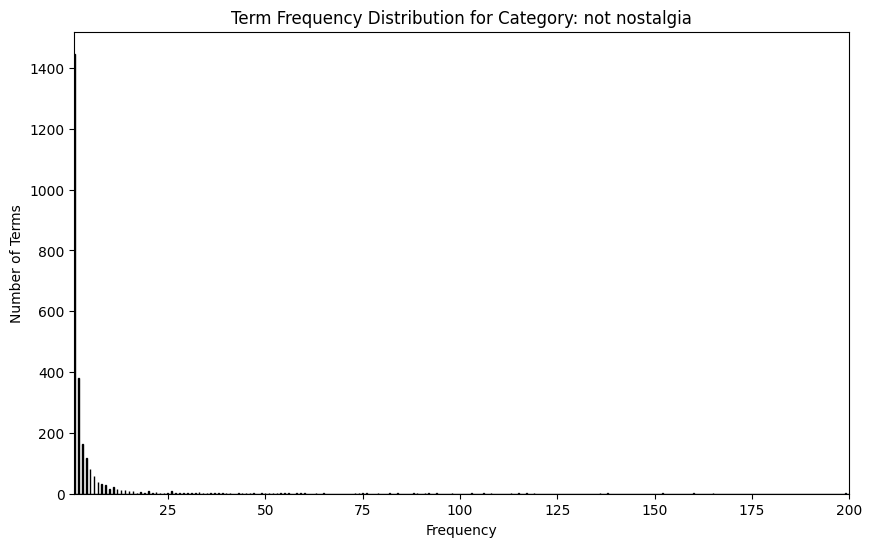

In [190]:
 # Sum over all documents to get total frequency for each word
sentiment_number=0 #You can change it from 0 to 1
word_counts = filt_term_document_dfs[categories[sentiment_number]].sum(axis=0).to_numpy()
 
# Visualize the frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=5000, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for Category: {categories[sentiment_number]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 200)
plt.show()

To improve our results, we can filter out these words. Specifically, we'll remove the **bottom 1%** of the least frequent words and the **top 5%** of the most frequent ones. This helps us focus on words that might reveal more valuable patterns.

In this case, the choice of filtering the top 5% and bottom 1% is **arbitrary**, but in other applications, domain knowledge might guide us to filter words differently, depending on the type of text classification we're working on.

In [191]:
category_number=1 #You can change it from 0 to 1

# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}') #Here we print which words correspond to the bottom percentage we filter
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}') #Here we print which words correspond to the top percentage we filter
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each category
term_document_dfs = {}

for category in categories:
    print(f'\nFor category: [{category}] we filter the following words:')
    term_document_dfs[category] = filter_top_bottom_words_by_sum(filt_term_document_dfs[category])


# Example: Display the filtered DataFrame for one of the categories
print(f"Filtered Term-Document Frequency DataFrame for Category: [{categories[category_number]}]:")
term_document_dfs[categories[category_number]]


For category: [not nostalgia] we filter the following words:
Bottom 1.0% words: 
00               1
montgomery       1
money            1
monday           1
moments          1
mocking          1
mock             1
mitch            1
misunderstood    1
minute           1
minds            1
miller           1
monumental       1
millennium       1
miles            1
microphone       1
miami            1
meta             1
mess             1
merle            1
mendes           1
mended           1
melting          1
melt             1
melodica         1
milestone        1
dtype: int64
Top 5.0% words: 
first       23
classic     23
amazing     24
wish        24
make        25
          ... 
of         361
to         394
and        451
this       453
the        708
Length: 130, dtype: int64

For category: [nostalgia] we filter the following words:
Bottom 1.0% words: 
yup            1
gospel         1
rose           1
round          1
rousing        1
goodness       1
routine        1
row   

07  10  11  11th  12  13  14  15  16  17  ...  yo  yokel  younger  \
0     0   0   0     0   0   0   0   0   0   0  ...   0      0        0   
1     0   0   0     0   0   0   0   0   0   1  ...   0      0        0   
2     0   0   0     0   0   0   0   0   0   0  ...   0      0        0   
3     0   0   0     0   0   0   0   0   0   0  ...   0      0        0   
4     0   0   0     0   0   0   0   0   0   0  ...   0      0        0   
..   ..  ..  ..   ...  ..  ..  ..  ..  ..  ..  ...  ..    ...      ...   
745   0   0   0     0   0   0   0   0   0   0  ...   0      0        0   
746   0   0   0     0   0   0   0   0   0   0  ...   0      0        0   
747   0   0   0     0   0   1   0   0   0   0  ...   0      0        0   
748   0   0   0     0   0   0   0   0   0   0  ...   0      0        0   
749   0   0   0     0   0   0   0   0   0   0  ...   0      0        0   

     youngster  your  yours  youth  youthful  youtube  yrs  
0            0     0      0      0         0        0    0  
1            0     0      0      0         0        0    0  
2            0     0      0      0         0        0    0  
3            0     1      0      0         0        0    0  
4            0     0      0      0         0        0    0  
..         ...   ...    ...    ...       ...      ...  ...  
745          0     0      0      0         0        0    0  
746          0     0      0      0         0        0    0  
747          0     0      0      0         0        0    0  
748          0     0      0      0         0        0    0  
749          0     0      0      0         0        0    0  

[750 rows x 2159 columns]

### We first need to convert our dataframe into a transactional database that the PAMI library can work with. We will generate a CSV file for each category to create this database.

In [192]:
import PAMI
# from PAMI.extras.DF2DB import DenseFormatDF as db      #Uncomment this line and comment the line below if this block of code 
                                                        #gives you trouble
from PAMI.extras.convert.DF2DB import DF2DB            

# # Loop through the dictionary of term-document DataFrames
# for category in term_document_dfs:
#     # Replace dots with underscores in the category name to avoid errors in the file creation
#     category_safe = category.replace('.', '_')
    
#     # Create the DenseFormatDF object and convert to a transactional database
#     # obj = db.DenseFormatDF(term_document_dfs[category]) #Uncomment this line and comment the line below if this block of code 
#                                                          #gives you trouble
#     obj = DF2DB(term_document_dfs[category])           
        
#     obj.convert2TransactionalDatabase(f'td_freq_db_{category_safe}.csv', '>=', 1)

Database size (total no of transactions) : 734
Number of items : 2159
Minimum Transaction Size : 1
Average Transaction Size : 8.693460490463215
Maximum Transaction Size : 39
Standard Deviation Transaction Size : 7.213372063492091
Variance in Transaction Sizes : 52.10372252435774
Sparsity : 0.9959733855996001


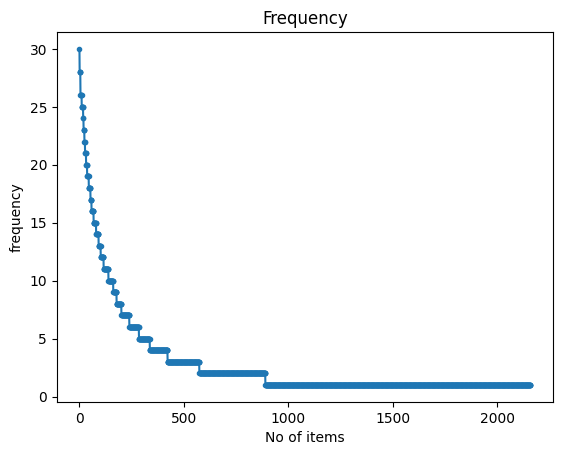

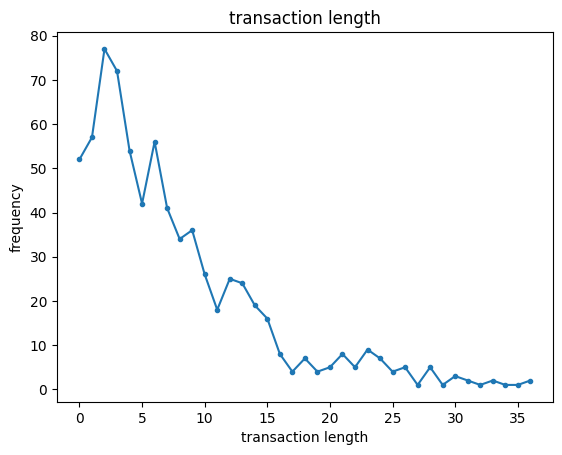

In [193]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 746
Number of items : 2446
Minimum Transaction Size : 1
Average Transaction Size : 8.402144772117962
Maximum Transaction Size : 46
Standard Deviation Transaction Size : 5.950348241365226
Variance in Transaction Sizes : 35.4541698904223
Sparsity : 0.9965649449010148


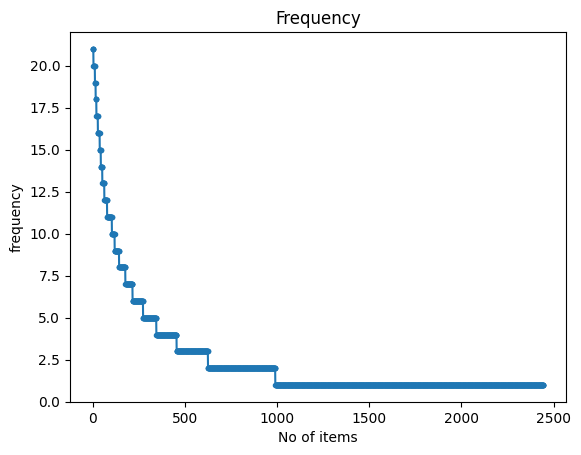

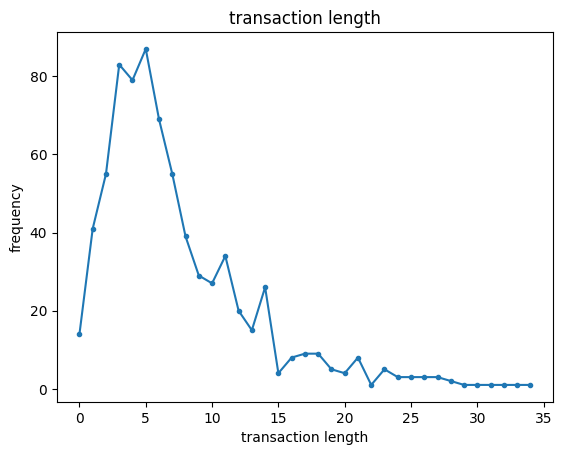

In [194]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_not nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

In [195]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=10 # ---------------------------------------------------------------------------------------------------------------------------------------# Minimum Support
obj1 = alg.FPGrowth(iFile='td_freq_db_nostalgia.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_nostalgia= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_nostalgia))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime


Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 164
Runtime: 0.0070056915283203125


In [196]:
obj1.save('freq_patterns_nostalgia.txt') #save the patterns
frequentPatternsDF_nostalgia

Patterns  Support
0        didn       10
1        also       10
2        into       10
3         god       10
4        home       10
..        ...      ...
159      ever       28
160     would       28
161      will       28
162        go       28
163  favorite       30

[164 rows x 2 columns]

In [197]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=10 # ---------------------------------------------------------------------------------------------------------------------------------------# Minimum Support
obj2 = alg.FPGrowth(iFile='td_freq_db_not nostalgia.csv', minSup=minSup)
obj2.mine()
frequentPatternsDF_not_nostalgia= obj2.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_not_nostalgia))) #print the total number of patterns
print('Runtime: ' + str(obj2.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 120
Runtime: 0.008007526397705078


In [198]:
obj2.save('freq_patterns_not_nostalgia.txt') #save the patterns
frequentPatternsDF_not_nostalgia

Patterns  Support
0       rock       10
1       says       10
2      other       10
3    emotion       10
4       tell       10
..       ...      ...
115    elvis       21
116    every       21
117    loved       21
118     them       21
119   lyrics       21

[120 rows x 2 columns]

In [199]:
import pandas as pd

#We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_not_nostalgia, frequentPatternsDF_nostalgia]


# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

    Patterns  Support
199     will       28
198    would       28
197     ever       28
196     wish       26
195       or       26
..       ...      ...
84      real       10
83       60s       10
82   awesome       10
80      home       10
0       rock       10

[200 rows x 2 columns]
Number of patterns discarded: 84


In [200]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(X['comment'])  # X['text'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
X['tokenized_comment'] = X['comment'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=X.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = X['tokenized_comment'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

00  000  045  07  10  100  10m  11  11th  12  ...  friends  god  \
0      0    0    0   0   0    0    0   0     0   0  ...        0    0   
1      0    0    0   0   0    0    0   0     0   0  ...        0    0   
2      0    0    0   0   0    0    0   0     0   0  ...        0    0   
3      0    0    0   0   0    0    0   0     0   0  ...        0    0   
4      0    0    0   0   0    0    0   0     0   0  ...        0    0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...      ...  ...   
1495   0    0    0   0   0    0    0   0     0   0  ...        0    0   
1496   0    0    0   0   0    0    0   0     0   0  ...        0    0   
1497   0    0    0   0   0    0    0   0     0   0  ...        0    0   
1498   0    0    0   0   0    0    0   0     0   0  ...        0    0   
1499   0    0    0   0   0    0    0   0     0   0  ...        0    0   

      changed  14  use  real  60s  awesome  home  rock  
0           0   0    0     0    0        0     0     0  
1           0   0    0     0    0        0     0     0  
2           0   0    0     0    0        0     0     0  
3           0   0    0     0    0        0     0     0  
4           0   0    0     0    0        0     0     0  
...       ...  ..  ...   ...  ...      ...   ...   ...  
1495        0   0    0     0    0        0     0     0  
1496        0   0    0     0    0        0     0     0  
1497        0   0    0     0    0        0     0     0  
1498        0   0    0     0    0        0     0     0  
1499        0   0    0     0    0        0     0     0  

[1500 rows x 3930 columns]

In [201]:
# # Find the indices where the values are non-zero or equal to 1
# non_zero_indices = augmented_df.stack().loc[lambda x: x != 0].index

# # Display the indices as [x, y] format
# indices_list = [[index[0], index[1]] for index in non_zero_indices]

# print(indices_list)

[[0, '16years'], [0, 'age'], [0, 'all'], [0, 'although'], [0, 'and'], [0, 'at'], [0, 'but'], [0, 'can'], [0, 'days'], [0, 'emotional'], [0, 'fan'], [0, 'feel'], [0, 'for'], [0, 'golden'], [0, 'great'], [0, 'have'], [0, 'he'], [0, 'hear'], [0, 'his'], [0, 'in'], [0, 'jim'], [0, 'life'], [0, 'lord'], [0, 'love'], [0, 'loving'], [0, 'many'], [0, 'now'], [0, 'of'], [0, 'reeves'], [0, 'relaxed'], [0, 'singer'], [0, 'singers'], [0, 'still'], [0, 'thank'], [0, 'that'], [0, 'the'], [0, 'those'], [0, 'time'], [0, 'to'], [0, 'voice'], [0, 'vouch'], [0, 'was'], [0, 'we'], [0, 'with'], [0, 'you'], [0, 'days'], [0, 'singers'], [0, 'singer'], [1, 'an'], [1, 'and'], [1, 'angel'], [1, 'beautiful'], [1, 'ever'], [1, 'forgotten'], [1, 'him'], [1, 'his'], [1, 'kid'], [1, 'listened'], [1, 'love'], [1, 'mist'], [1, 'never'], [1, 'of'], [1, 'singing'], [1, 'still'], [1, 'the'], [1, 'to'], [1, 'voice'], [1, 'was'], [1, 'when'], [1, 'ever'], [1, 'kid'], [1, 'listened'], [2, '17'], [2, 'age'], [2, 'always'], [

## Dimensionality Reduction

In [202]:
#Applying dimensionality reduction with only the document-term frequency data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

#This might take a couple of minutes to execute
# Apply PCA, t-SNE, and UMAP to the data
X_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)             # reduction to 2 dimensions
X_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)           # reduction to 2 dimensions
X_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)      # reduction to 2 dimensions

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



In [203]:
tdm_df.shape

(1500, 3730)

In [204]:
X_pca_tdm.shape

(1500, 2)

In [205]:
X_tsne_tdm.shape

(1500, 2)

In [206]:
X_umap_tdm.shape

(1500, 2)

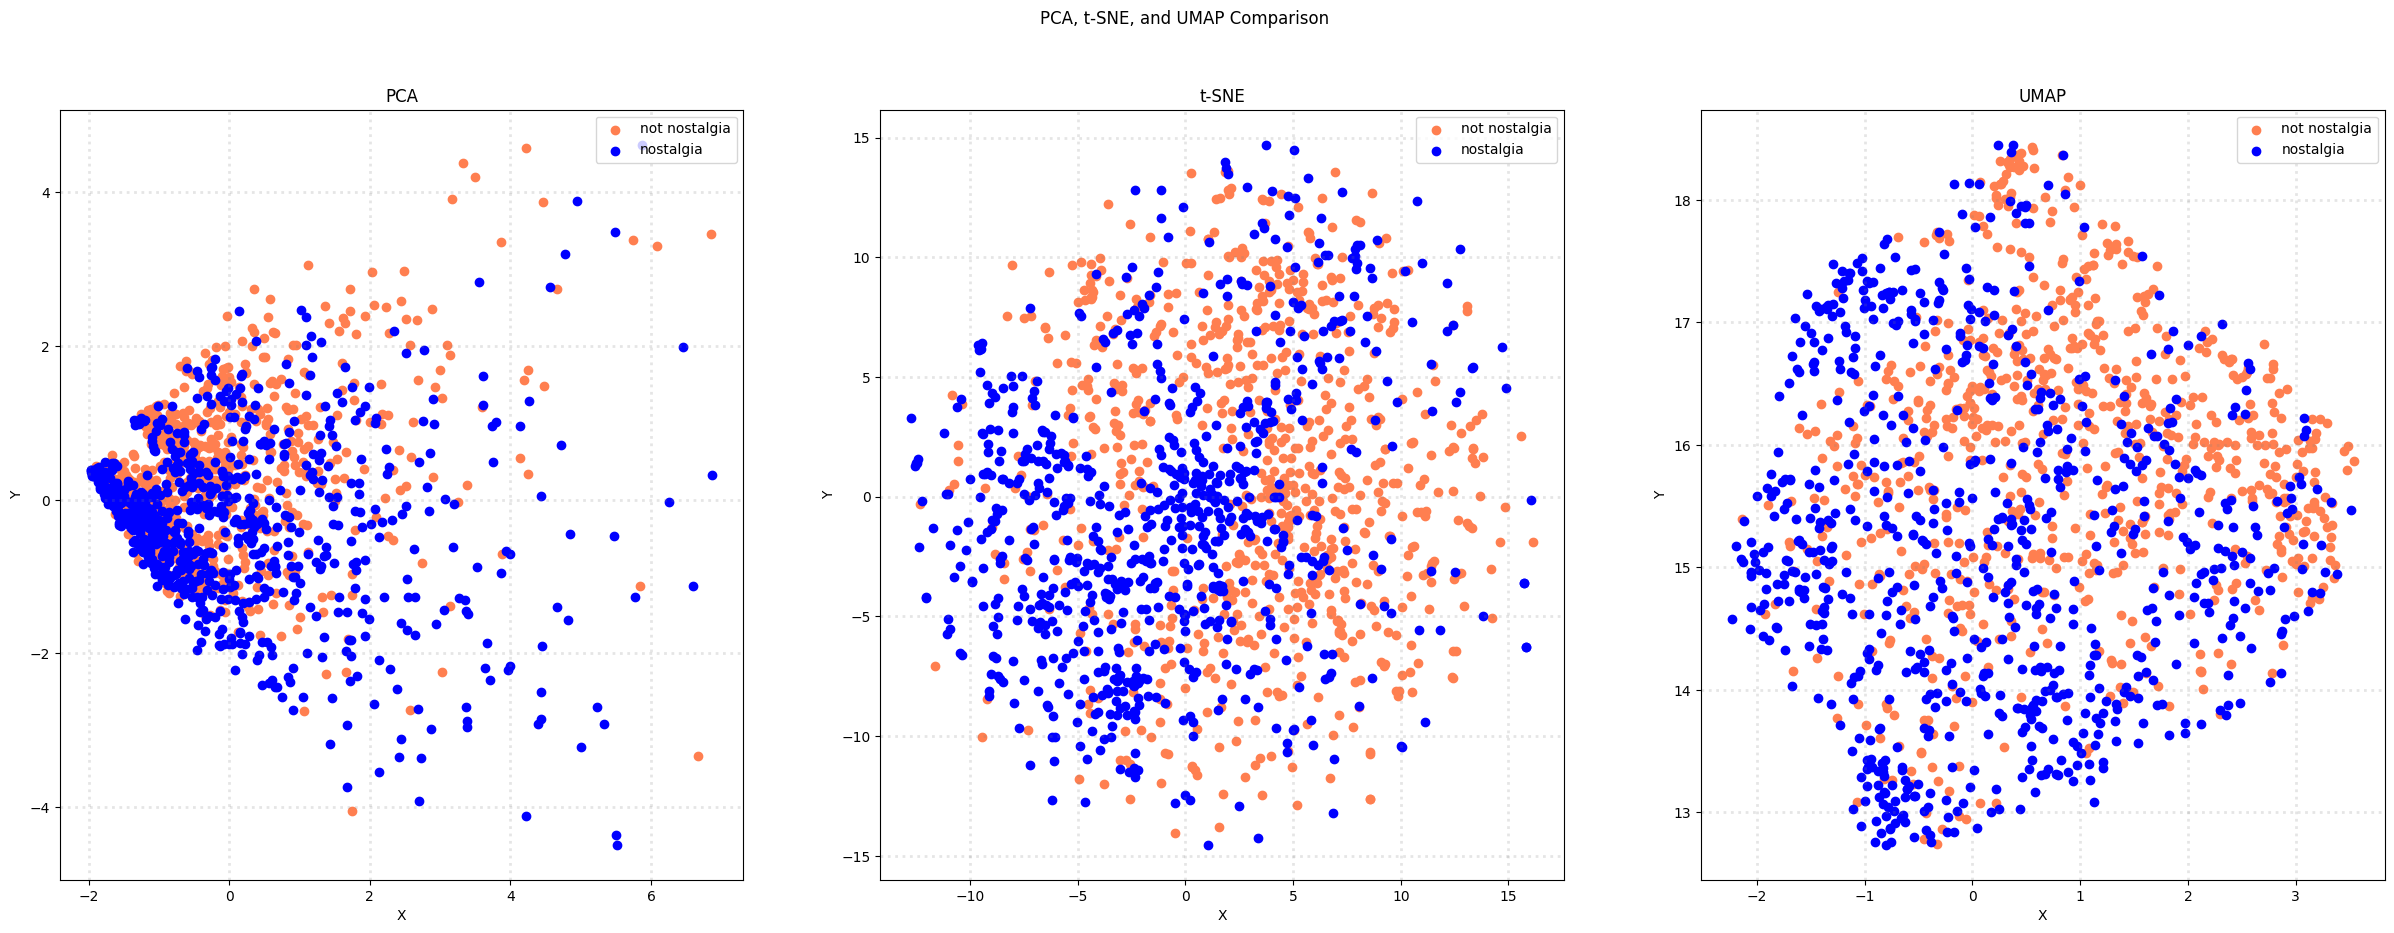

In [207]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = X['sentiment'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['sentiment'] == category].T[0]
        ys = X_reduced[X['sentiment'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_tdm, 'PCA')
plot_scatter(axes[1], X_tsne_tdm, 't-SNE')
plot_scatter(axes[2], X_umap_tdm, 'UMAP')

plt.show()

### Now let's try in tandem with our pattern augmented data:

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



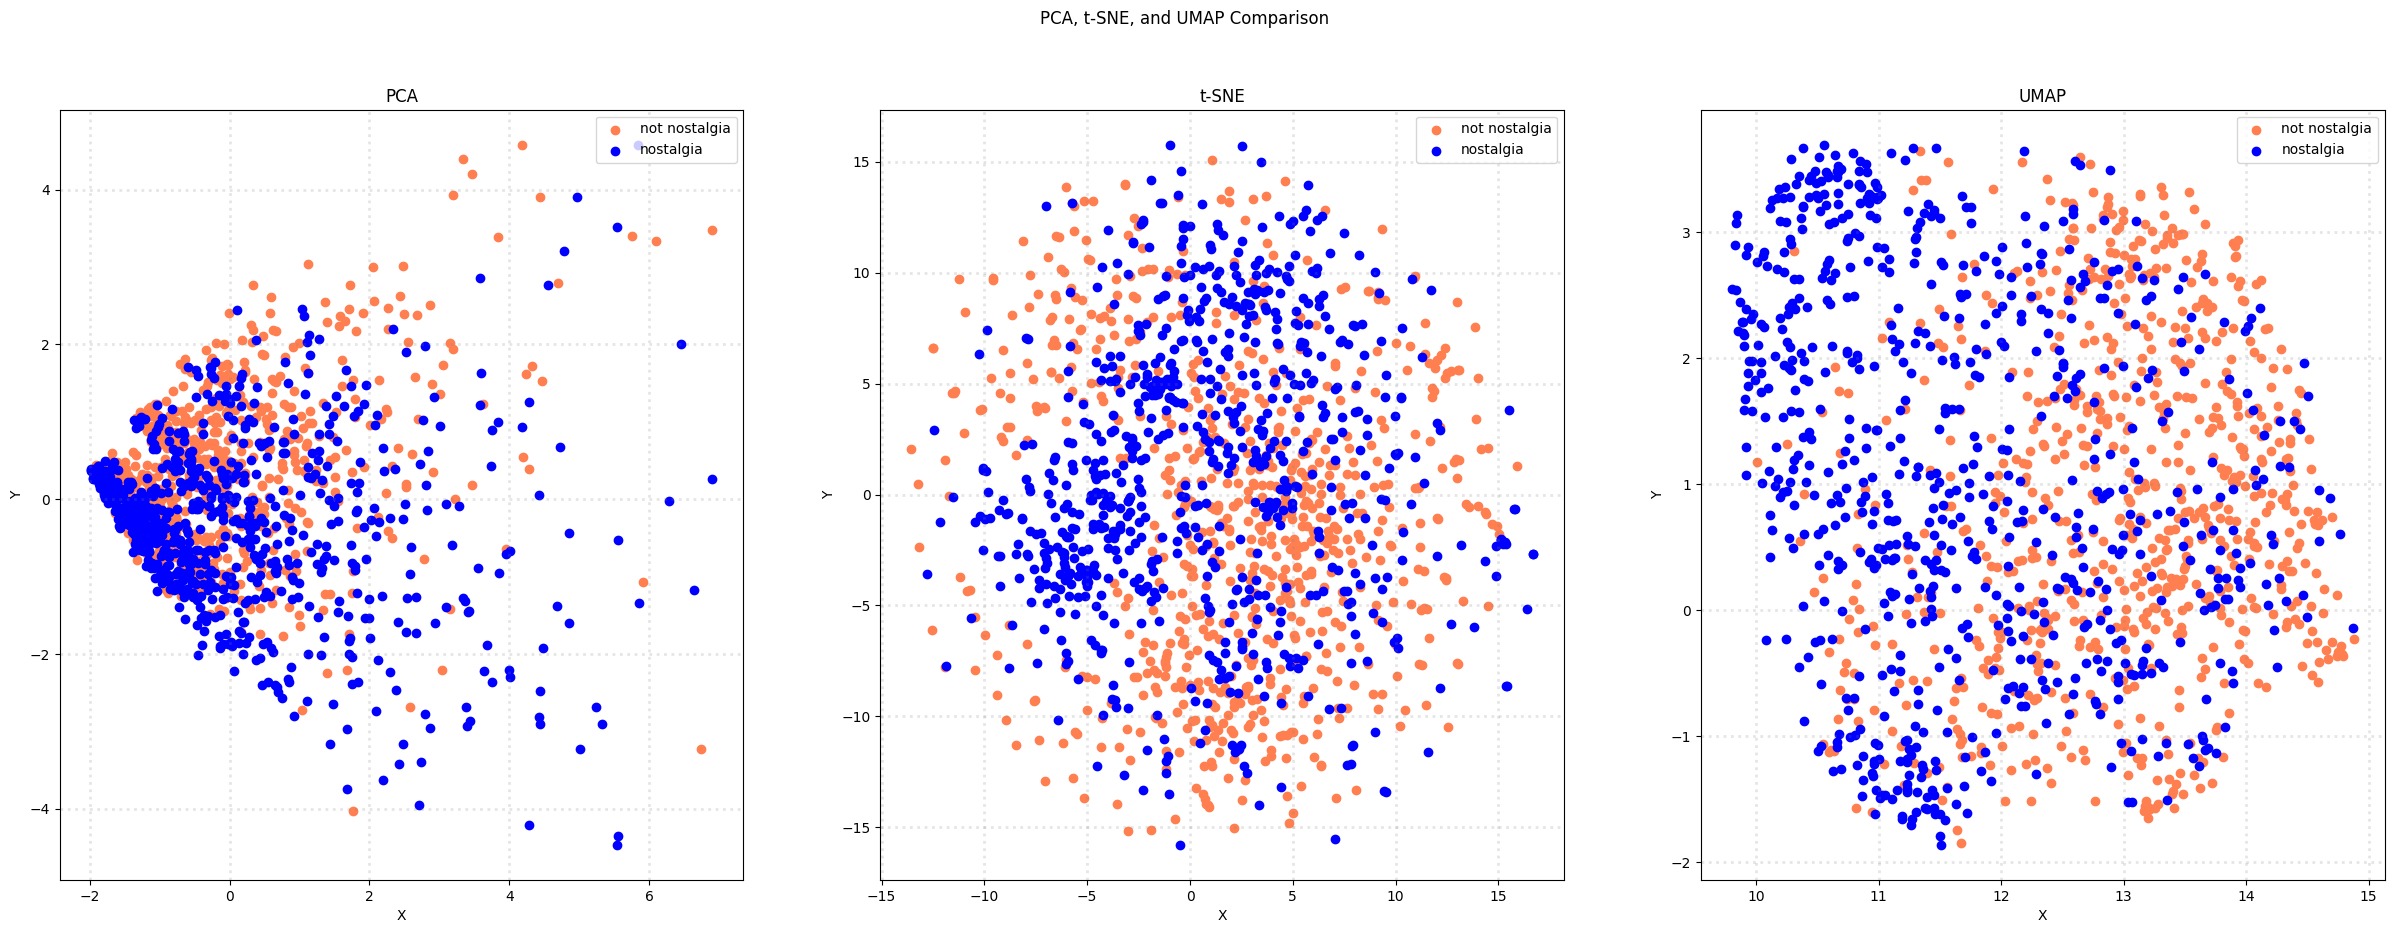

In [208]:
#This might take a couple of minutes to execute
#Applying dimensionality reduction with both the document-term frequency data and the pattern derived data
# Apply PCA, t-SNE, and UMAP to the data
X_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = X['sentiment'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['sentiment'] == category].T[0]
        ys = X_reduced[X['sentiment'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_aug, 'PCA')
plot_scatter(axes[1], X_tsne_aug, 't-SNE')
plot_scatter(axes[2], X_umap_aug, 'UMAP')

plt.show()

### Reduce the dimension to 3, and plot the result use 3-D plot

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



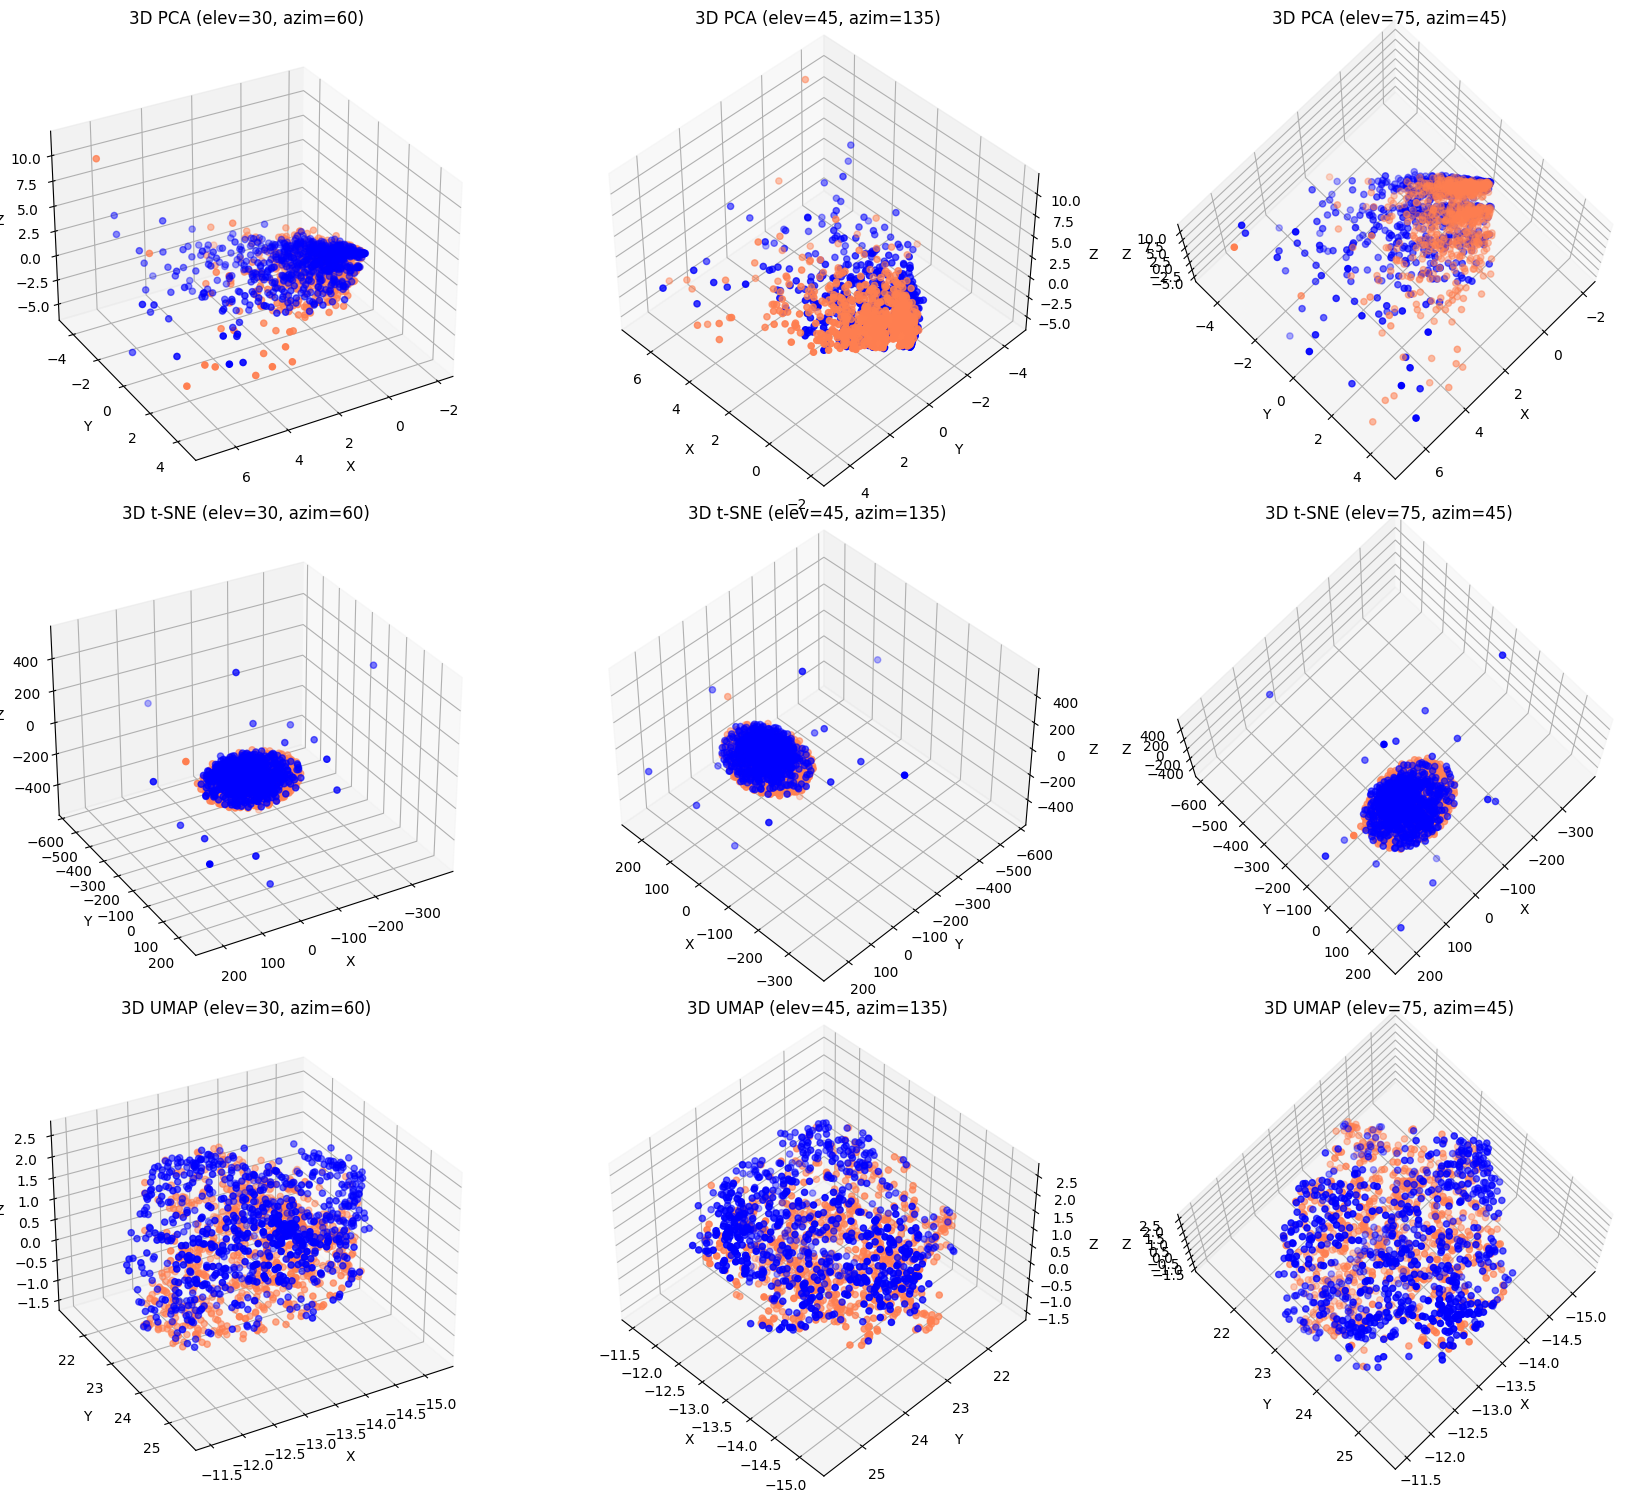

In [209]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Apply PCA, t-SNE, and UMAP to reduce dimensions to 3
X_pca_tdm_3d = PCA(n_components=3).fit_transform(tdm_df.values)
X_tsne_tdm_3d = TSNE(n_components=3).fit_transform(tdm_df.values)
X_umap_tdm_3d = umap.UMAP(n_components=3).fit_transform(tdm_df.values)

# Define a function to create 3D scatter plot
def plot_3d_scatter(ax, X, title, elev, azim):
    sentiments = X['sentiment'].unique()
    colors = ['coral', 'blue', 'black', 'orange']
    
    for sentiment, color in zip(sentiments, colors):
        xs = X[X['sentiment'] == sentiment]['X1']
        ys = X[X['sentiment'] == sentiment]['X2']
        zs = X[X['sentiment'] == sentiment]['X3']
        ax.scatter(xs, ys, zs, label=sentiment, color=color, s=20)
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(title)
    ax.view_init(elev=elev, azim=azim)

# Create DataFrames for 3D projections
X_pca_3d_df = pd.DataFrame(X_pca_tdm_3d, columns=['X1', 'X2', 'X3'])
X_tsne_3d_df = pd.DataFrame(X_tsne_tdm_3d, columns=['X1', 'X2', 'X3'])
X_umap_3d_df = pd.DataFrame(X_umap_tdm_3d, columns=['X1', 'X2', 'X3'])

X_pca_3d_df['sentiment'] = X['sentiment']
X_tsne_3d_df['sentiment'] = X['sentiment']
X_umap_3d_df['sentiment'] = X['sentiment']

# Create a figure with subplots (3 rows, 3 columns)
fig, axes = plt.subplots(3, 3, figsize=(18, 15), subplot_kw={'projection': '3d'})

# Set camera angles for different views
angles = [(30, 60), (45, 135), (75, 45)]

# Plot 3D PCA with different angles
for i, (elev, azim) in enumerate(angles):
    plot_3d_scatter(axes[0, i], X_pca_3d_df, f'3D PCA (elev={elev}, azim={azim})', elev, azim)

# Plot 3D t-SNE with different angles
for i, (elev, azim) in enumerate(angles):
    plot_3d_scatter(axes[1, i], X_tsne_3d_df, f'3D t-SNE (elev={elev}, azim={azim})', elev, azim)

# Plot 3D UMAP with different angles
for i, (elev, azim) in enumerate(angles):
    plot_3d_scatter(axes[2, i], X_umap_3d_df, f'3D UMAP (elev={elev}, azim={azim})', elev, azim)

# Adjust layout and show the figure
plt.tight_layout()
plt.show()

### augmented data

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



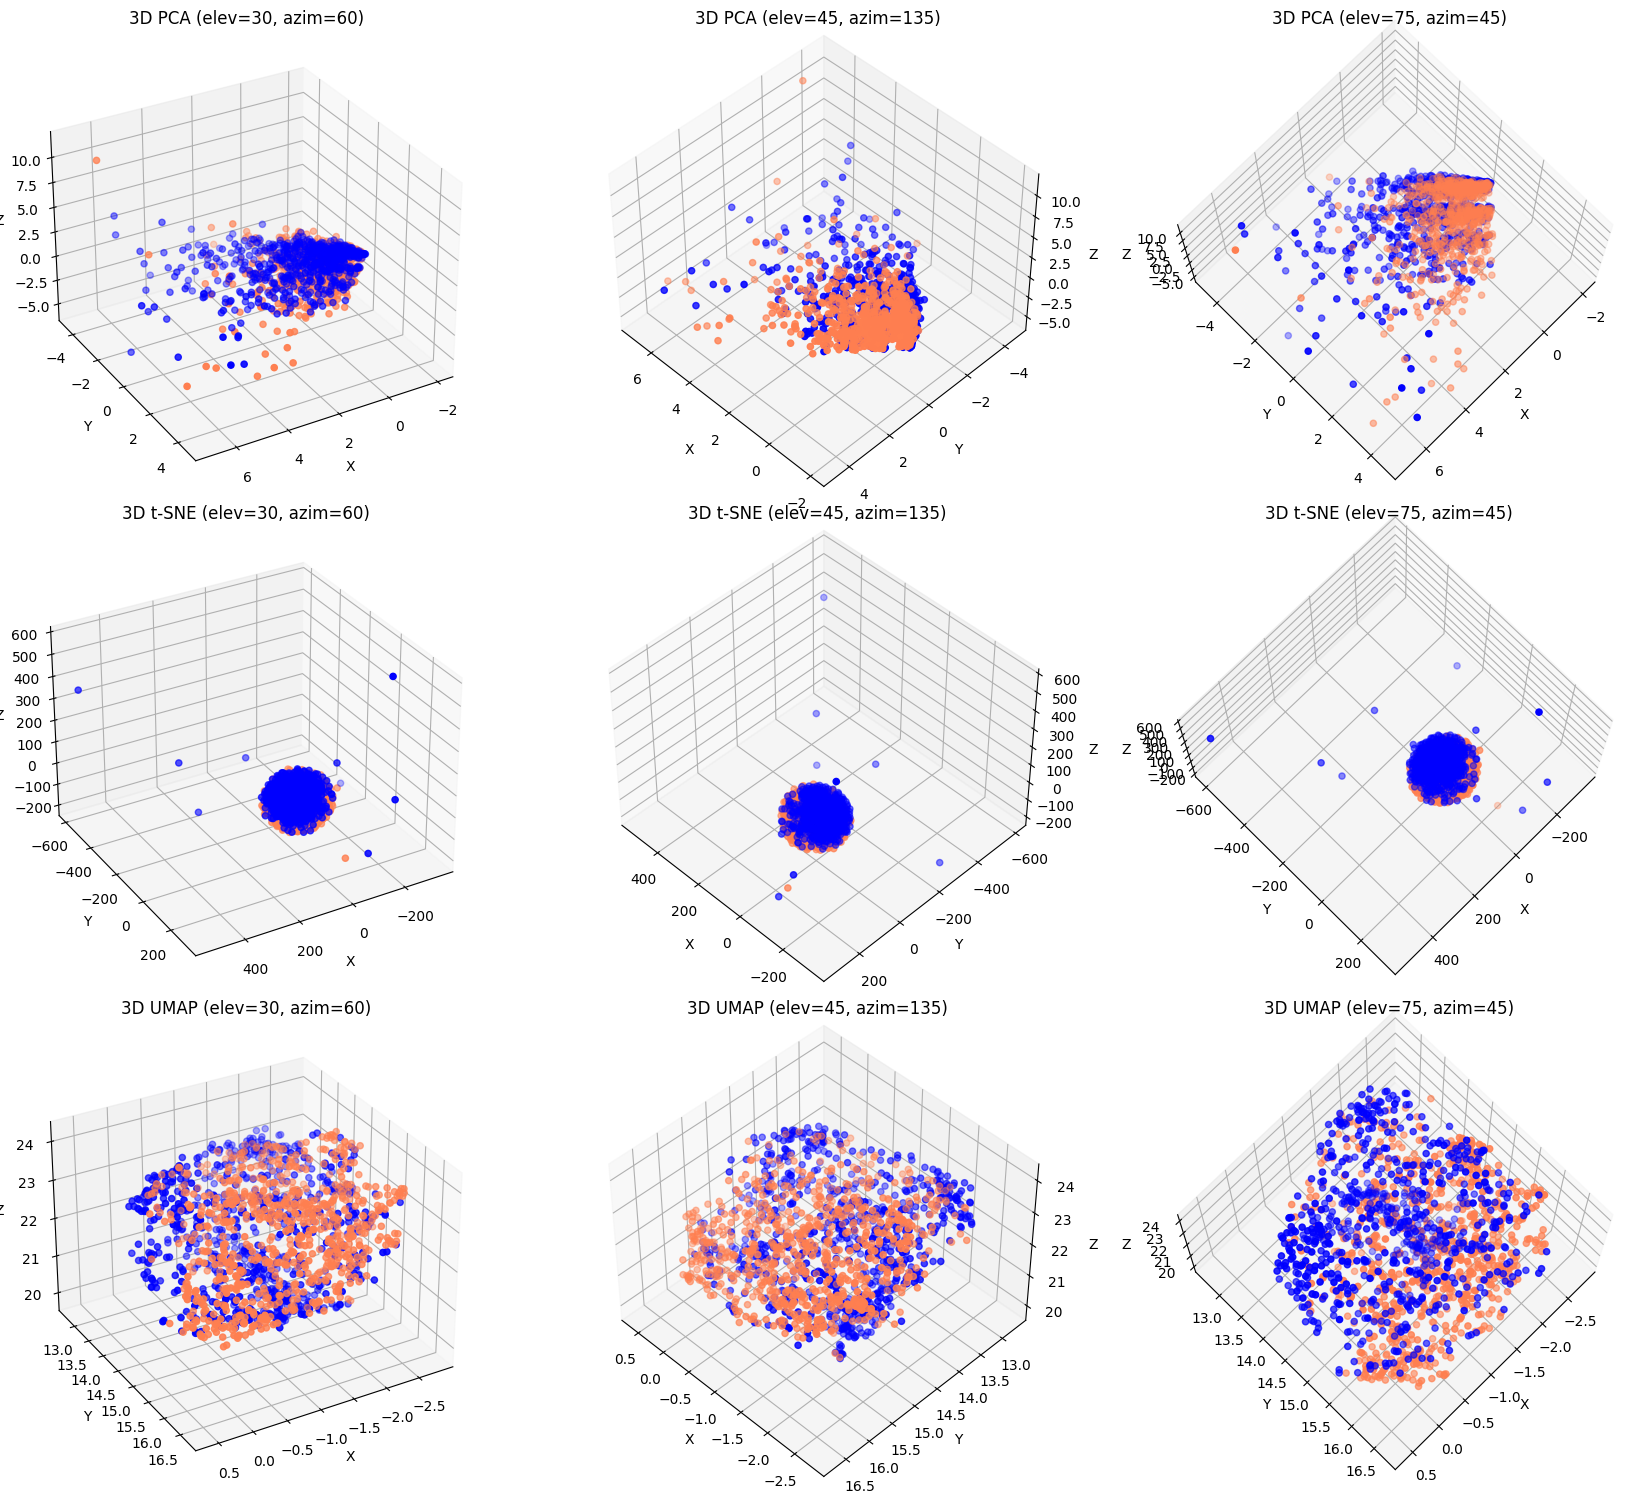

In [210]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Apply PCA, t-SNE, and UMAP to reduce dimensions to 3
X_pca_tdm_3d = PCA(n_components=3).fit_transform(augmented_df.values)
X_tsne_tdm_3d = TSNE(n_components=3).fit_transform(augmented_df.values)
X_umap_tdm_3d = umap.UMAP(n_components=3).fit_transform(augmented_df.values)

# Define a function to create 3D scatter plot
def plot_3d_scatter(ax, X, title, elev, azim):
    sentiments = X['sentiment'].unique()
    colors = ['coral', 'blue', 'black', 'orange']
    
    for sentiment, color in zip(sentiments, colors):
        xs = X[X['sentiment'] == sentiment]['X1']
        ys = X[X['sentiment'] == sentiment]['X2']
        zs = X[X['sentiment'] == sentiment]['X3']
        ax.scatter(xs, ys, zs, label=sentiment, color=color, s=20)
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(title)
    ax.view_init(elev=elev, azim=azim)

# Create DataFrames for 3D projections
X_pca_3d_df = pd.DataFrame(X_pca_tdm_3d, columns=['X1', 'X2', 'X3'])
X_tsne_3d_df = pd.DataFrame(X_tsne_tdm_3d, columns=['X1', 'X2', 'X3'])
X_umap_3d_df = pd.DataFrame(X_umap_tdm_3d, columns=['X1', 'X2', 'X3'])

X_pca_3d_df['sentiment'] = X['sentiment']
X_tsne_3d_df['sentiment'] = X['sentiment']
X_umap_3d_df['sentiment'] = X['sentiment']

# Create a figure with subplots (3 rows, 3 columns)
fig, axes = plt.subplots(3, 3, figsize=(18, 15), subplot_kw={'projection': '3d'})

# Set camera angles for different views
angles = [(30, 60), (45, 135), (75, 45)]

# Plot 3D PCA with different angles
for i, (elev, azim) in enumerate(angles):
    plot_3d_scatter(axes[0, i], X_pca_3d_df, f'3D PCA (elev={elev}, azim={azim})', elev, azim)

# Plot 3D t-SNE with different angles
for i, (elev, azim) in enumerate(angles):
    plot_3d_scatter(axes[1, i], X_tsne_3d_df, f'3D t-SNE (elev={elev}, azim={azim})', elev, azim)

# Plot 3D UMAP with different angles
for i, (elev, azim) in enumerate(angles):
    plot_3d_scatter(axes[2, i], X_umap_3d_df, f'3D UMAP (elev={elev}, azim={azim})', elev, azim)

# Adjust layout and show the figure
plt.tight_layout()
plt.show()

## Discretization and Binarization

In [211]:
from sklearn.preprocessing import LabelBinarizer

# Initialize the LabelBinarizer
mlb2 = LabelBinarizer()

mlb2.fit(X.sentiment)

# Fit and transform the 'category_name' column
X['bin_sentiment'] = mlb2.transform(X['sentiment']).tolist()

# Display the first few rows to check the new binary column
X[['sentiment', 'bin_sentiment']].head(20)

sentiment bin_sentiment
0   not nostalgia           [1]
1       nostalgia           [0]
2       nostalgia           [0]
3   not nostalgia           [1]
4       nostalgia           [0]
5       nostalgia           [0]
6       nostalgia           [0]
7       nostalgia           [0]
8   not nostalgia           [1]
9   not nostalgia           [1]
10  not nostalgia           [1]
11      nostalgia           [0]
12      nostalgia           [0]
13      nostalgia           [0]
14  not nostalgia           [1]
15  not nostalgia           [1]
16  not nostalgia           [1]
17      nostalgia           [0]
18      nostalgia           [0]
19      nostalgia           [0]

## Data Classification (using Naive Bayes classifier)

In [212]:
#Model with only the document-term frequency data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
category_mapping = dict(X[['sentiment_number', 'sentiment']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, X['sentiment_number'], test_size=0.3, random_state=42)

In [213]:
X[['sentiment_number', 'sentiment']]

sentiment_number      sentiment
0                    0  not nostalgia
1                    1      nostalgia
2                    1      nostalgia
3                    0  not nostalgia
4                    1      nostalgia
...                ...            ...
1495                 0  not nostalgia
1496                 0  not nostalgia
1497                 0  not nostalgia
1498                 1      nostalgia
1499                 1      nostalgia

[1500 rows x 2 columns]

In [214]:
X_train

00  000  045  07  10  100  10m  11  11th  12  ...  yours  yourself  \
485    0    0    0   0   0    0    0   0     0   0  ...      0         0   
527    0    0    0   0   0    0    0   0     0   0  ...      0         0   
199    0    0    0   0   0    0    0   0     0   0  ...      0         0   
889    0    0    0   0   0    0    0   0     0   0  ...      0         0   
844    0    0    0   0   0    0    0   0     0   0  ...      0         0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...    ...       ...   
1130   0    0    0   0   1    0    0   0     0   0  ...      0         0   
1294   0    0    0   0   0    0    0   0     0   0  ...      0         0   
860    0    0    0   0   0    0    0   0     0   0  ...      0         0   
1459   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1126   0    0    0   0   0    0    0   0     0   0  ...      0         0   

      youth  youthful  youtube  yrs  yuo  yup  zealand  zulus  
485       0         0        0    0    0    0        0      0  
527       0         0        0    0    0    0        0      0  
199       0         0        0    0    0    0        0      0  
889       0         0        0    0    0    0        0      0  
844       0         0        0    0    0    0        0      0  
...     ...       ...      ...  ...  ...  ...      ...    ...  
1130      0         0        0    0    0    0        0      0  
1294      0         0        0    0    0    0        0      0  
860       0         0        0    0    0    0        0      0  
1459      0         0        0    0    0    0        0      0  
1126      0         0        0    0    0    0        0      0  

[1050 rows x 3730 columns]

In [215]:
X_test

00  000  045  07  10  100  10m  11  11th  12  ...  yours  yourself  \
1116   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1368   0    0    0   0   0    0    0   0     0   0  ...      0         0   
422    0    0    0   0   0    0    0   0     0   0  ...      0         0   
413    0    0    0   0   0    0    0   0     0   0  ...      0         0   
451    0    0    0   0   0    0    0   0     0   0  ...      0         0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...    ...       ...   
1083   0    0    0   0   0    0    0   0     0   0  ...      0         0   
990    0    0    0   0   0    0    0   0     0   0  ...      0         0   
650    0    0    0   0   0    0    0   0     0   0  ...      0         0   
1188   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1498   0    0    0   0   0    0    0   0     0   0  ...      0         0   

      youth  youthful  youtube  yrs  yuo  yup  zealand  zulus  
1116      0         0        0    0    0    0        0      0  
1368      0         0        0    0    0    0        0      0  
422       0         0        0    0    0    0        0      0  
413       0         0        0    0    0    0        0      0  
451       0         0        0    0    0    0        0      0  
...     ...       ...      ...  ...  ...  ...      ...    ...  
1083      0         0        0    0    0    0        0      0  
990       0         0        0    0    0    0        0      0  
650       0         0        0    0    0    0        0      0  
1188      0         0        0    0    0    0        0      0  
1498      0         0        0    0    0    0        0      0  

[450 rows x 3730 columns]

In [216]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:595: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:604: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\user\AppData\Local\Programs\Python\Pyth

Accuracy: 0.8422222222222222

Classification Report:
                precision    recall  f1-score   support

not nostalgia     0.9140    0.7556    0.8273       225
    nostalgia     0.7917    0.9289    0.8548       225

     accuracy                         0.8422       450
    macro avg     0.8528    0.8422    0.8410       450
 weighted avg     0.8528    0.8422    0.8410       450



### Model with augmented data

In [217]:
#Model with only the document-term frequency data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
category_mapping = dict(X[['sentiment_number', 'sentiment']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(augmented_df, X['sentiment_number'], test_size=0.3, random_state=42)

In [218]:
X_train

00  000  045  07  10  100  10m  11  11th  12  ...  friends  god  \
485    0    0    0   0   0    0    0   0     0   0  ...        0    0   
527    0    0    0   0   0    0    0   0     0   0  ...        0    0   
199    0    0    0   0   0    0    0   0     0   0  ...        0    0   
889    0    0    0   0   0    0    0   0     0   0  ...        0    0   
844    0    0    0   0   0    0    0   0     0   0  ...        0    0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...      ...  ...   
1130   0    0    0   0   1    0    0   0     0   0  ...        0    0   
1294   0    0    0   0   0    0    0   0     0   0  ...        0    0   
860    0    0    0   0   0    0    0   0     0   0  ...        0    0   
1459   0    0    0   0   0    0    0   0     0   0  ...        0    0   
1126   0    0    0   0   0    0    0   0     0   0  ...        0    0   

      changed  14  use  real  60s  awesome  home  rock  
485         0   0    0     0    0        0     0     0  
527         0   0    0     0    0        0     0     0  
199         0   0    0     0    0        0     0     0  
889         0   0    0     0    0        0     0     0  
844         0   0    0     0    0        0     0     0  
...       ...  ..  ...   ...  ...      ...   ...   ...  
1130        0   0    0     0    0        0     0     0  
1294        0   0    0     0    0        0     0     0  
860         0   0    0     0    0        1     0     0  
1459        0   0    0     0    0        0     0     0  
1126        0   0    0     0    0        0     0     0  

[1050 rows x 3930 columns]

In [219]:
X_test

00  000  045  07  10  100  10m  11  11th  12  ...  friends  god  \
1116   0    0    0   0   0    0    0   0     0   0  ...        0    0   
1368   0    0    0   0   0    0    0   0     0   0  ...        0    0   
422    0    0    0   0   0    0    0   0     0   0  ...        0    0   
413    0    0    0   0   0    0    0   0     0   0  ...        0    0   
451    0    0    0   0   0    0    0   0     0   0  ...        0    0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...      ...  ...   
1083   0    0    0   0   0    0    0   0     0   0  ...        0    0   
990    0    0    0   0   0    0    0   0     0   0  ...        0    0   
650    0    0    0   0   0    0    0   0     0   0  ...        0    0   
1188   0    0    0   0   0    0    0   0     0   0  ...        0    0   
1498   0    0    0   0   0    0    0   0     0   0  ...        0    0   

      changed  14  use  real  60s  awesome  home  rock  
1116        0   0    0     0    0        0     0     0  
1368        0   0    0     0    0        0     0     0  
422         0   0    0     0    0        0     0     0  
413         0   0    0     1    0        0     0     0  
451         0   0    0     0    0        0     0     0  
...       ...  ..  ...   ...  ...      ...   ...   ...  
1083        0   0    0     0    0        0     0     0  
990         0   0    0     0    0        0     0     0  
650         0   0    0     0    0        0     0     0  
1188        0   1    0     0    0        0     0     0  
1498        0   0    0     0    0        0     0     0  

[450 rows x 3930 columns]

In [220]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:595: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:604: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\user\AppData\Local\Programs\Python\Pyth

Accuracy: 0.8444444444444444

Classification Report:
                precision    recall  f1-score   support

not nostalgia     0.9101    0.7644    0.8309       225
    nostalgia     0.7969    0.9244    0.8560       225

     accuracy                         0.8444       450
    macro avg     0.8535    0.8444    0.8434       450
 weighted avg     0.8535    0.8444    0.8434       450

